# Pham Thanh Dat - 20521175

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('Data-Gold.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df_VND = df['VND'].values.reshape(-1, 1)

df

,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75
...,...
2022-12-26,41586906.00
2022-12-27,41894838.00
2022-12-28,41727084.00


# Vẽ đồ thị

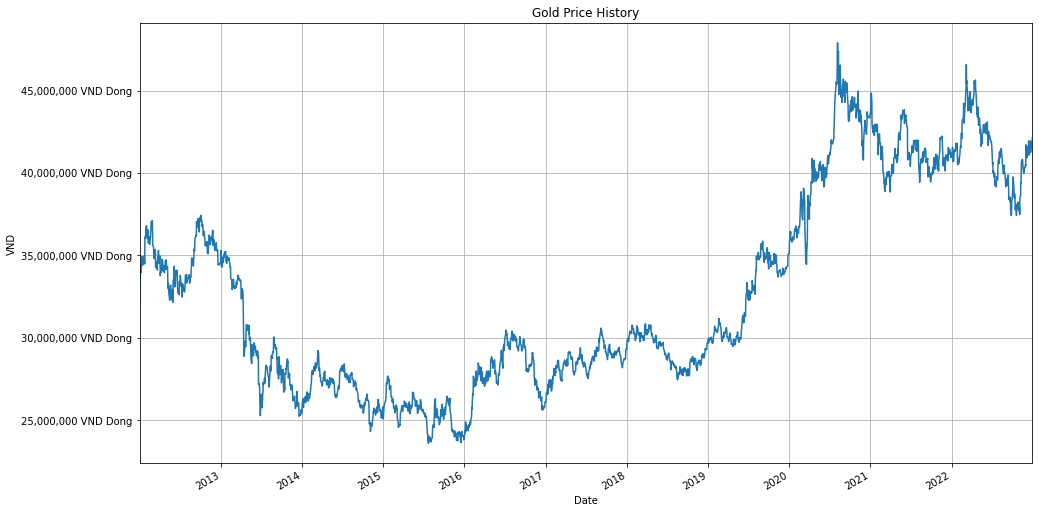

In [ ]:
formatter = ticker.StrMethodFormatter('{x:,.0f} VND Dong')

title = 'Gold Price History'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

In [ ]:
gold_price=df['VND']
values=gold_price.values
Train_len=math.ceil(len(values)*0.9)
Train_len

2583

### Trực chuẩn hoá dữ liệu

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(df)
scaled_data

array([[0.35425019],
       [0.4120421 ],
       [0.42501583],
       ...,
       [0.74596438],
       [0.75560409],
       [0.76288112]])

### Create Training & Testing Data

In [ ]:
train_data=scaled_data[0:Train_len,:]

train_x=[]
train_y=[]

for i in range(365, len(train_data)):  # 1 years
  train_x.append(train_data[i-365:i,0])
  train_y.append(train_data[i,0])

train_x,train_y=np.array(train_x), np.array(train_y)

train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))


### Xây dựng model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
m=model.fit(train_x, train_y,batch_size= 32, epochs=50)

Epoch 1/50
70/70 [==============================] - 54s 644ms/step - loss: 0.0063
Epoch 2/50
70/70 [==============================] - 38s 548ms/step - loss: 7.3701e-04
Epoch 3/50
70/70 [==============================] - 39s 558ms/step - loss: 6.5130e-04
Epoch 4/50
70/70 [==============================] - 37s 531ms/step - loss: 6.4069e-04
Epoch 5/50
70/70 [==============================] - 37s 530ms/step - loss: 5.6707e-04
Epoch 6/50
70/70 [==============================] - 39s 551ms/step - loss: 5.2777e-04
Epoch 7/50
70/70 [==============================] - 37s 528ms/step - loss: 4.9312e-04
Epoch 8/50
70/70 [==============================] - 37s 530ms/step - loss: 4.6664e-04
Epoch 9/50
70/70 [==============================] - 38s 549ms/step - loss: 4.5019e-04
Epoch 10/50
70/70 [==============================] - 37s 532ms/step - loss: 4.3777e-04
Epoch 11/50
70/70 [==============================] - 37s 534ms/step - loss: 4.9275e-04
Epoch 12/50
70/70 [==============================] - 37s

In [ ]:
model.save("GoldPrice_lstm_9_1.h5")

In [ ]:
# Create the testing data
test_data=scaled_data[Train_len-365:,:]
test_x=[]
test_y=df[Train_len:]
for i in range (365, len(test_data)):
  test_x.append(test_data[i-365:i,0])
test_x=np.array(test_x)
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [ ]:
Predictions= model.predict(test_x)
Predictions=sc.inverse_transform(Predictions)

9/9 [==============================] - 2s 163ms/step


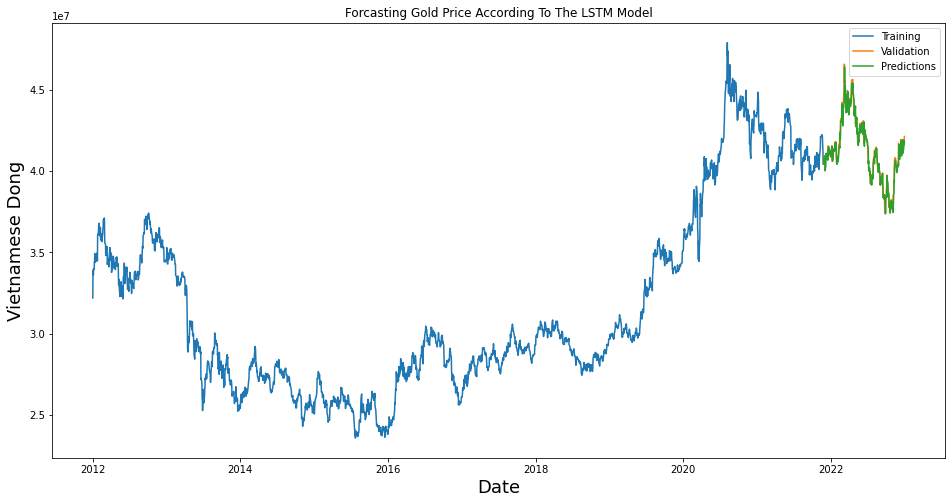

In [ ]:
#plot data
train=df[:Train_len]
validation=df[Train_len:]
validation['Predictions']= Predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Forcasting Gold Price According To The LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Vietnamese Dong',fontsize=18)
plt.plot(train['VND'])
plt.plot(validation[['VND','Predictions']])
plt.legend(['Training','Validation','Predictions'])
plt.show()

In [ ]:
validation

,VND,Predictions
Date,,
2021-11-25,40546299.04,40436168.0
2021-11-26,40840344.31,40606868.0
2021-11-29,40523204.39,40902272.0
2021-11-30,40948149.18,40516852.0
2021-12-01,40642813.75,40915240.0
...,...,...
2022-12-26,41586906.00,41354580.0
2022-12-27,41894838.00,41535848.0
2022-12-28,41727084.00,41851036.0


In [ ]:
data=validation['VND']

In [ ]:
data

Date
2021-11-25    40546299.04
2021-11-26    40840344.31
2021-11-29    40523204.39
2021-11-30    40948149.18
2021-12-01    40642813.75
                 ...     
2022-12-26    41586906.00
2022-12-27    41894838.00
2022-12-28    41727084.00
2022-12-29    41961480.00
2022-12-30    42138426.00
Name: VND, Length: 287, dtype: float64

In [ ]:
mae = mean_absolute_error(data, Predictions)
mape = mean_absolute_percentage_error(data, Predictions)
mse = mean_squared_error(data, Predictions)
rmse = np.sqrt(mse)
r2 = r2_score(data, Predictions)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")

MAPE: 0.74%
RMSE: 404883


In [ ]:
Last_half_year=df[-548:].values
Last_half_year_scaled=sc.transform(Last_half_year)
x_test=[]
x_test.append(Last_half_year_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1, 548, 1)

In [ ]:
model.reset_states()
pred_price=model.predict(x_test)
pred_price=sc.inverse_transform(pred_price)
print(pred_price) #2022-04-09

1/1 [==============================] - 1s 877ms/step
[[42054232.]]


In [ ]:
len(test_data)

652

In [ ]:
#Getting the last 100 days records
future=test_data[552:]

In [ ]:
future=future.reshape(1,-1)
temp=list(future)
future.shape

(1, 100)

In [ ]:
#Creating list of the last 100 data
temp=temp[0].tolist()

In [ ]:
#Predicting next 30 days price using the current data
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        future = np.array(temp[1:])
        future=future.reshape(1,-1)
        future = future.reshape((1, n_steps, 1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future = future.reshape((1, n_steps,1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.7594186663627625], [0.7549229860305786], [0.7500720620155334], [0.7458367943763733], [0.7424865365028381], [0.7399115562438965], [0.7378268241882324], [0.7359366416931152], [0.7340266108512878], [0.731991708278656], [0.7298203706741333], [0.7275592684745789], [0.7252768874168396], [0.7230359315872192], [0.720879077911377], [0.7188249826431274], [0.7168733477592468], [0.7150114178657532], [0.7132217288017273], [0.7114869952201843], [0.709793210029602], [0.7081307768821716], [0.7064939141273499], [0.704879105091095], [0.7032844424247742], [0.7017084956169128], [0.7001499533653259], [0.6986069679260254], [0.6970775127410889], [0.695560097694397]]


In [ ]:
tam=sc.inverse_transform(lst_output)
print(tam)

[[42054234.05557089]
 [41944918.54876437]
 [41826965.05162882]
 [41723981.6555182 ]
 [41642517.87021384]
 [41579905.48427352]
 [41529213.81485271]
 [41483252.74953154]
 [41436809.05824066]
 [41387329.02638949]
 [41334531.48449416]
 [41279551.2557808 ]
 [41224053.61724404]
 [41169563.26113658]
 [41117117.90575971]
 [41067171.19053841]
 [41019715.86883651]
 [40974441.7846254 ]
 [40930924.28502484]
 [40888743.06513625]
 [40847557.53305908]
 [40807134.34710825]
 [40767332.92254185]
 [40728067.74905293]
 [40689292.44816991]
 [40650972.23603912]
 [40613075.22746137]
 [40575556.49329232]
 [40538366.75640594]
 [40501469.78362131]]


In [ ]:
len(tam)

30

In [ ]:
len(scaled_data)

2870

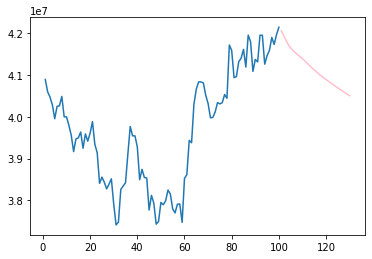

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, sc.inverse_transform(scaled_data[2770:]))
plt.plot(plot_pred, sc.inverse_transform(lst_output),c='pink')

In [ ]:
dataset_new=scaled_data.tolist()

In [ ]:
len(dataset_new)

2870

In [ ]:
#Entends helps us to fill the missing value with approx value
dataset_new.extend(lst_output)

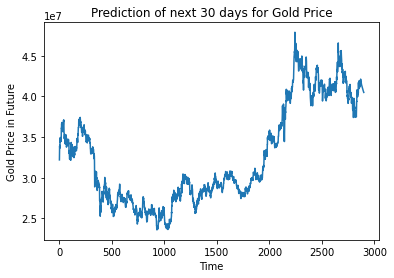

In [ ]:
final=sc.inverse_transform(dataset_new).tolist()

plt.ylabel("Gold Price in Future")
plt.xlabel("Time")
plt.title("Prediction of next 30 days for Gold Price")
plt.plot(final,)
plt.show()